In [1]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
plt.style.use('ggplot')
import warnings
import itertools
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## Input Data and extract required columns

In [3]:
df = pd.read_csv('electricity generated.csv')
df=df[['Year','Electricity generated_NR']]
df['Electricity generated_NR'] = df['Electricity generated_NR'].astype(float)

#### Convert the Year column to Date type

In [4]:
df['Year'] = pd.to_datetime(df['Year'], format = '%Y')

#### Set the Date for index

In [5]:
df.set_index('Year', inplace=True)  # Set 'date' as index

In [6]:
sns.histplot

<function seaborn.distributions.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)>

#### Checking the head of the data

In [7]:
df.head()

,Electricity generated_NR
Year,
1920-01-01,4.275
1921-01-01,3.890
1922-01-01,4.541
1923-01-01,5.289
1924-01-01,6.022


#### Checking info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102 entries, 1920-01-01 to 2021-01-01
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Electricity generated_NR  102 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


### Let's visualise Electricity generated in each year

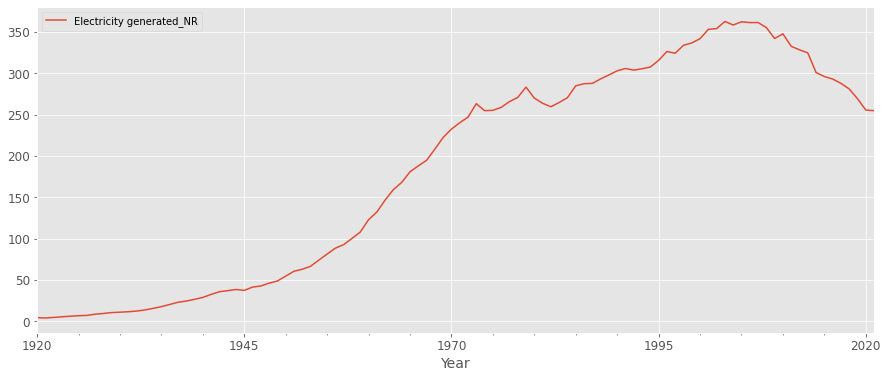

In [9]:
df.plot(figsize=(15, 6))
plt.show()

### Let's visualise the data using time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

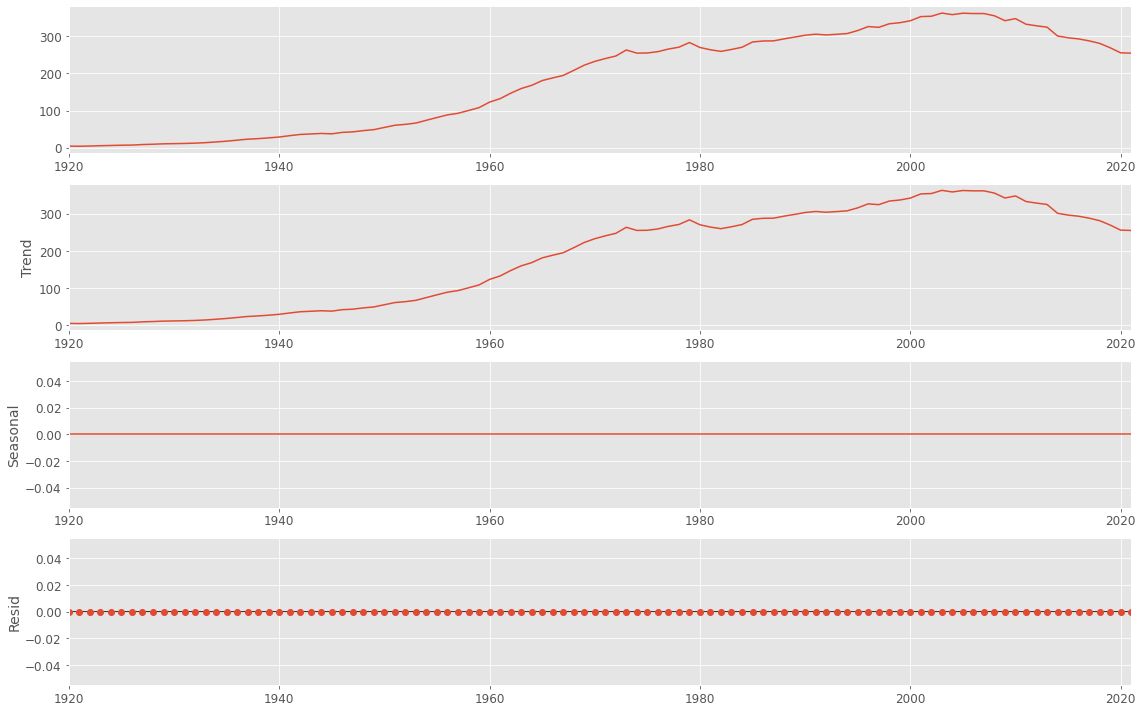

In [10]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 16, 10
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

## Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF).
### The ACF and PACF are used to figure out the order of AR, MA, and ARMA models.

In [11]:
from statsmodels.tsa.stattools import adfuller,acf, pacf

In [12]:
def stationarity_test(timeseries):
    # Get rolling statistics for window = 12 i.e. yearly statistics
    rolling_mean = timeseries.rolling(window = 12).mean()
    rolling_std = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistic
    plt.figure(figsize= (10,6))
    plt.xlabel('Years')
    plt.ylabel('Electricity generated_NR')    
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color= 'blue', label= 'Original')
    plt.plot(rolling_mean, color= 'green', label= 'Rolling Mean')
    plt.plot(rolling_std, color= 'red', label= 'Rolling Std')   
    plt.legend()
    plt.show()
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
    print(df_output)

#### Meaning of Stationary

1. Stationarity means that the statistical properties of a a time series (or rather the process generating it) do not change over time. 
2. Stationarity is important because many useful analytical tools and statistical tests and models rely on it.

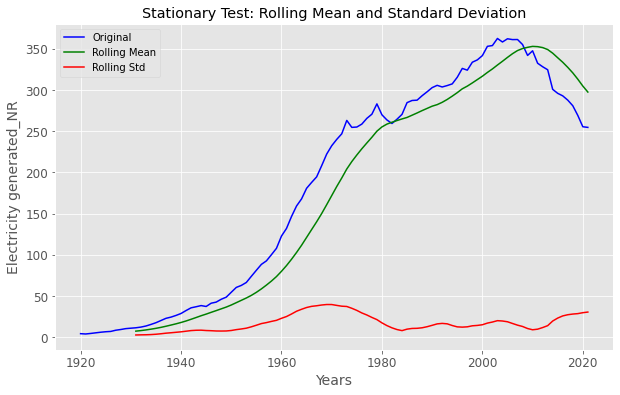

Results of Dickey-Fuller Test
Test Statistic                 -2.189002
p-value                         0.210261
#Lags Used                      6.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


In [13]:
# Lets test the stationarity score with original series data
stationarity_test(df)

Convert Non-Stationary Data to Stationary Data
Let's first use the differencing technique to obtain the stationarity.

Differencing
To transform the series using 'Differencing' we will use the diff() method of pandas. A benefit of using the Pandas function, in addition to requiring less code, is that it maintains the date-time information for the differenced series

`Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.`

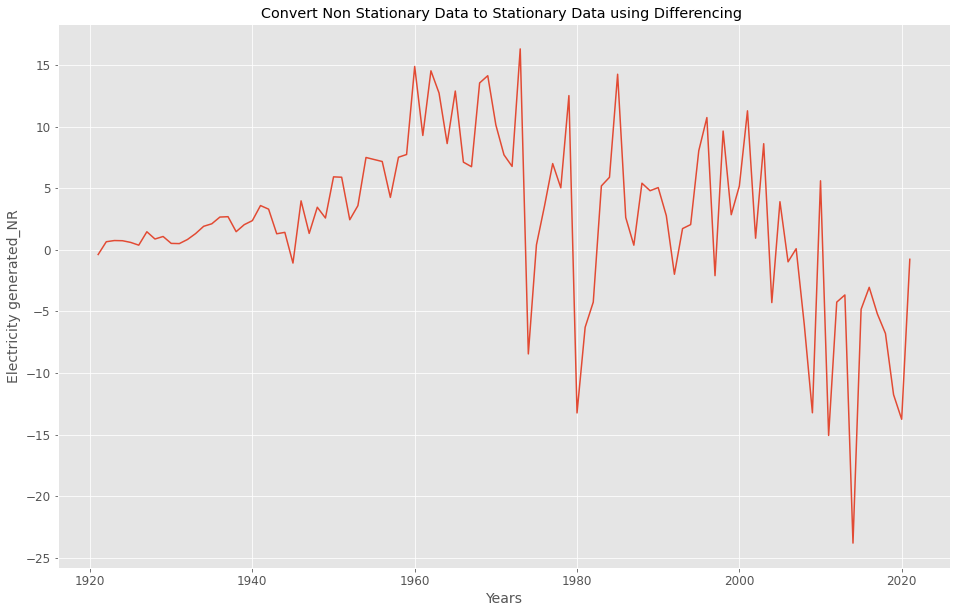

In [14]:
df_diff = df.diff(periods = 1) # First order differencing
plt.xlabel('Years')
plt.ylabel('Electricity generated_NR')    
plt.title('Convert Non Stationary Data to Stationary Data using Differencing ')
plt.plot(df_diff)

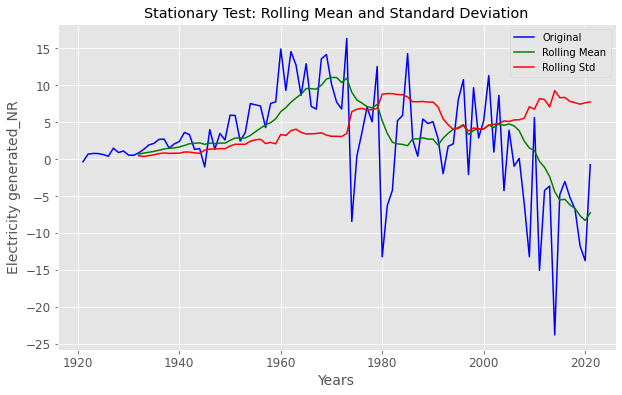

Results of Dickey-Fuller Test
Test Statistic                 -0.746520
p-value                         0.834329
#Lags Used                      5.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


In [15]:
df_diff.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_diff)

1. For forecasting and economic analysis many variables are used in logarithms (logs). 
2. In time series analysis this transformation is often considered to stabilize the variance of a series.

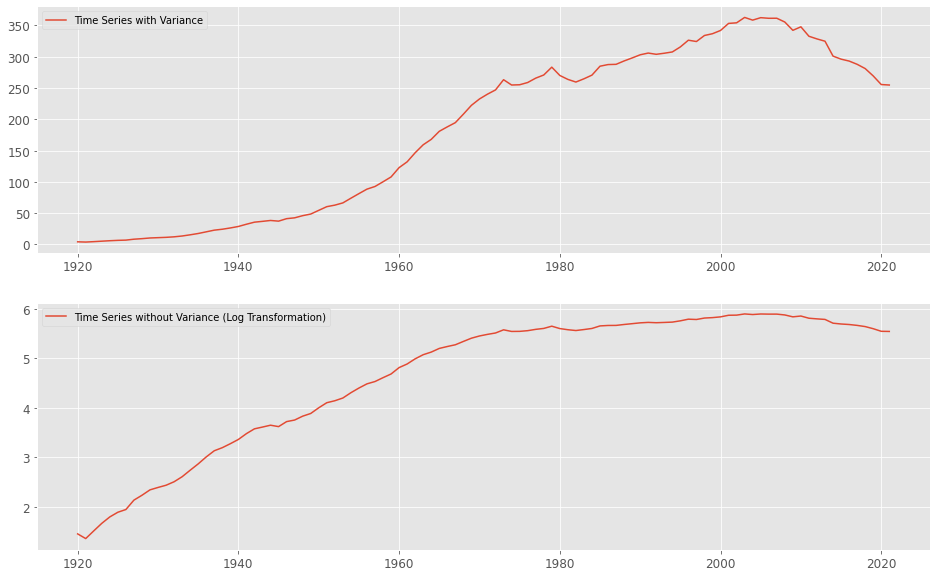

In [16]:
df_log = np.log(df)

plt.subplot(211)
plt.plot(df, label= 'Time Series with Variance')
plt.legend()
plt.subplot(212)
plt.plot(df_log, label='Time Series without Variance (Log Transformation)')
plt.legend()  
plt.show()

### Differencing in Time Series
1. The first difference of a time series is the series of changes from one period to the next. 
2. If Yt denotes the value of the time series Y at period t, then the first difference of Y at period t is equal to Yt-Yt-1.

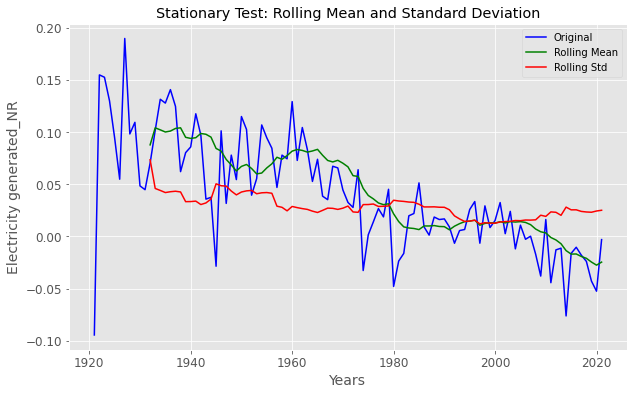

Results of Dickey-Fuller Test
Test Statistic                 -1.116044
p-value                         0.708632
#Lags Used                      4.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


In [17]:
df_log_diff = df_log.diff(periods = 1) # First order differencing

df_log_diff.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_log_diff)

#### Moving Average
1. Since we have time series data from 1970 to 2021, we will define a yearly window for moving average. 
2. Window size = 12. 
3. Note that we are going to use Log transformed data.

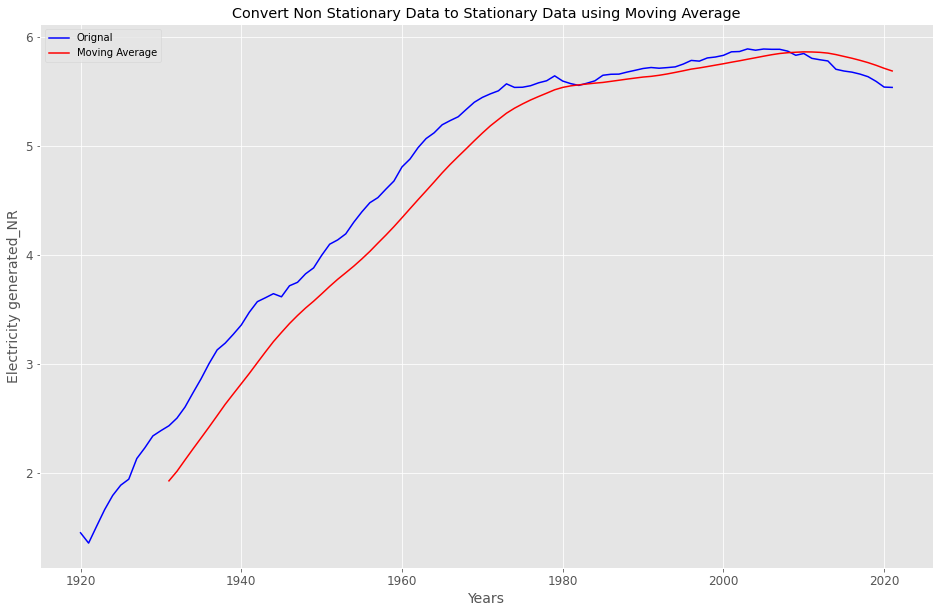

In [18]:
df_log_moving_avg = df_log.rolling(window = 12).mean()
plt.xlabel('Years')
plt.ylabel('Electricity generated_NR')    
plt.title('Convert Non Stationary Data to Stationary Data using Moving Average')
plt.plot(df_log, color= 'blue', label='Orignal')
plt.plot(df_log_moving_avg, color= 'red', label='Moving Average')
plt.legend()

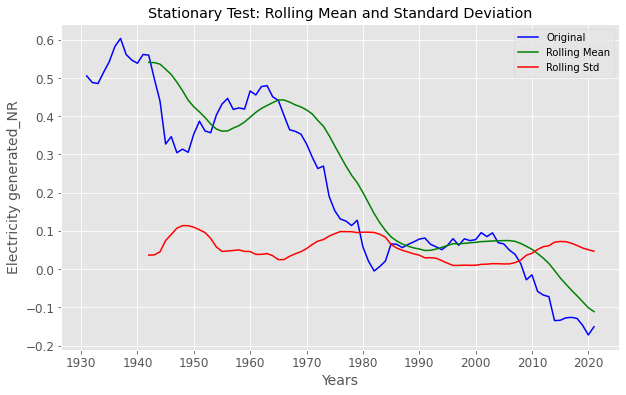

Results of Dickey-Fuller Test
Test Statistic                 -0.629835
p-value                         0.864097
#Lags Used                      2.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64


In [19]:
df_log_moving_avg_diff = df_log - df_log_moving_avg
df_log_moving_avg_diff.dropna(inplace = True)
stationarity_test(df_log_moving_avg_diff)

### Weighted Moving Average (WMA)
1. Here we are going to use exponentially weighted moving average with parameter ‘halflife = 12’. 
2. This parameter defines the amount of exponential decay.

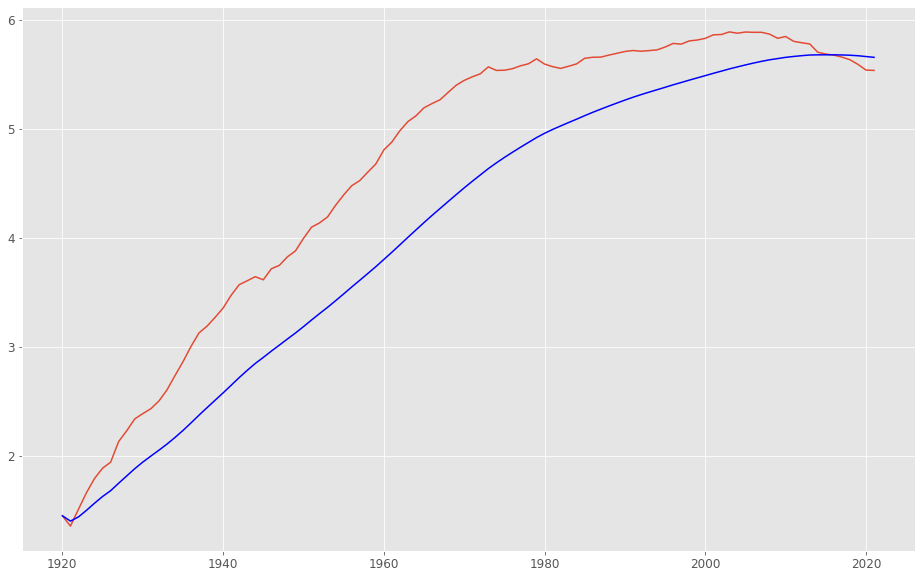

In [20]:
df_log_weighted_avg = df_log.ewm(halflife = 12).mean()
plt.plot(df_log)
plt.plot(df_log_weighted_avg, color = 'blue')

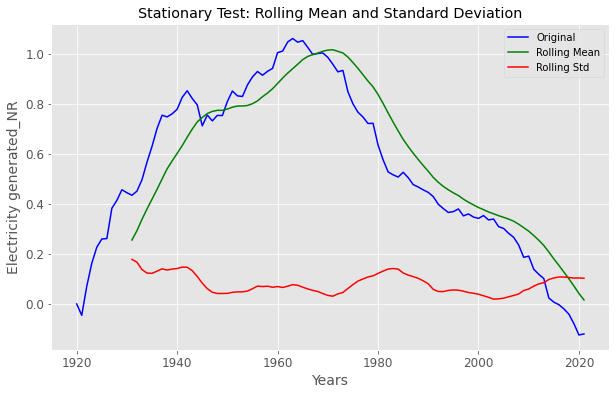

Results of Dickey-Fuller Test
Test Statistic                 -0.468523
p-value                         0.898014
#Lags Used                      2.000000
Number of Observations Used    99.000000
Critical Value (1%)            -3.498198
Critical Value (5%)            -2.891208
Critical Value (10%)           -2.582596
dtype: float64


In [21]:
df_log_weighted_avg_diff = df_log - df_log_weighted_avg
stationarity_test(df_log_weighted_avg_diff)

#### Decomposition of Time Series

1. The decomposition of time series is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns.

2. Let's now use the decomposition technique to deconstruct the log transformed time series data, so that we can check the stationarity using residual data.



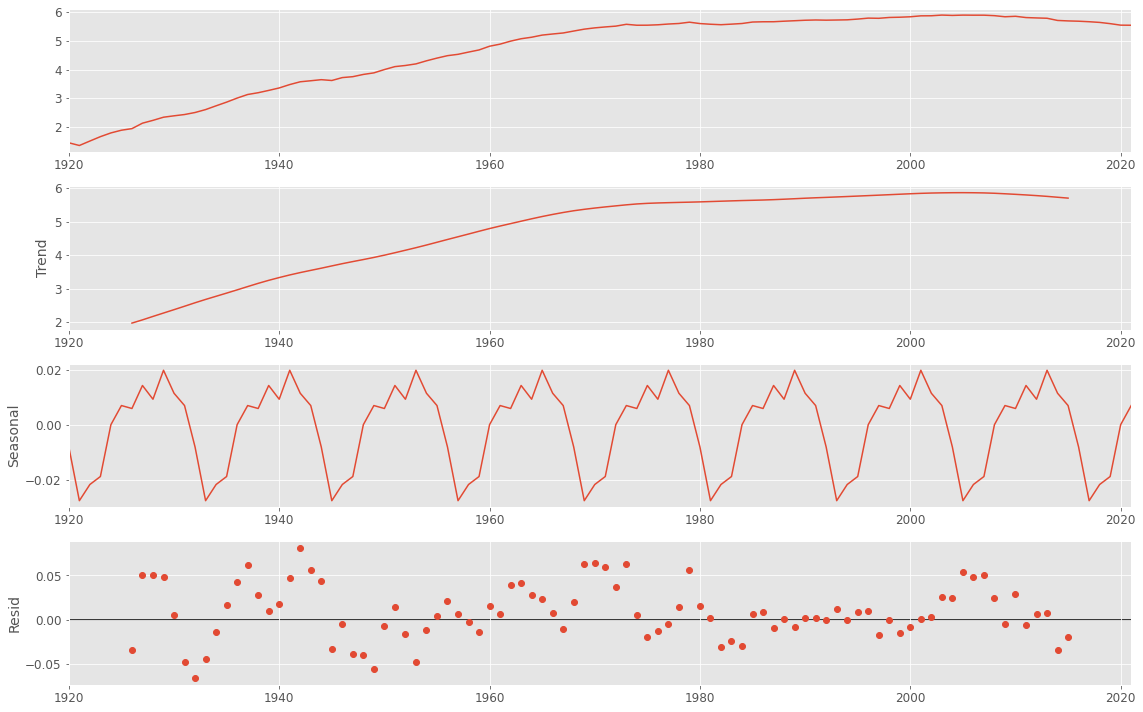

In [22]:
decomposition = sm.tsa.seasonal_decompose(df_log,period =12)
fig = decomposition.plot()

Here we can see that the trend and seasonality are separated out from log transformed data, and we can now check the stationarity of the residuals

1. The “residuals” in a time series model are what is left over after fitting a model. 
2. For many (but not all) time series models, the residuals are equal to the difference between the observations  
   and the corresponding fitted values: et=yt−y_t.

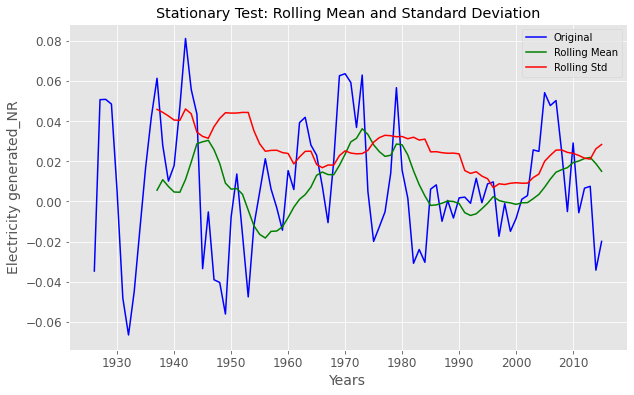

Results of Dickey-Fuller Test
Test Statistic                 -4.511005
p-value                         0.000188
#Lags Used                      0.000000
Number of Observations Used    89.000000
Critical Value (1%)            -3.506057
Critical Value (5%)            -2.894607
Critical Value (10%)           -2.584410
dtype: float64


In [23]:
df_log_residual = decomposition.resid
df_log_residual.dropna(inplace = True)
stationarity_test(df_log_residual)

### ACF and PACF Plots
1. To figure out the order of AR model(p) we will use PACF function. 
2. p = the lag value where the PACF chart crosses the upper confidence interval for the first time
3. To figure out the order of MA model(q) we will use ACF function. 
4. q = the lag value where the ACF chart crosses the upper confidence interval for the first time

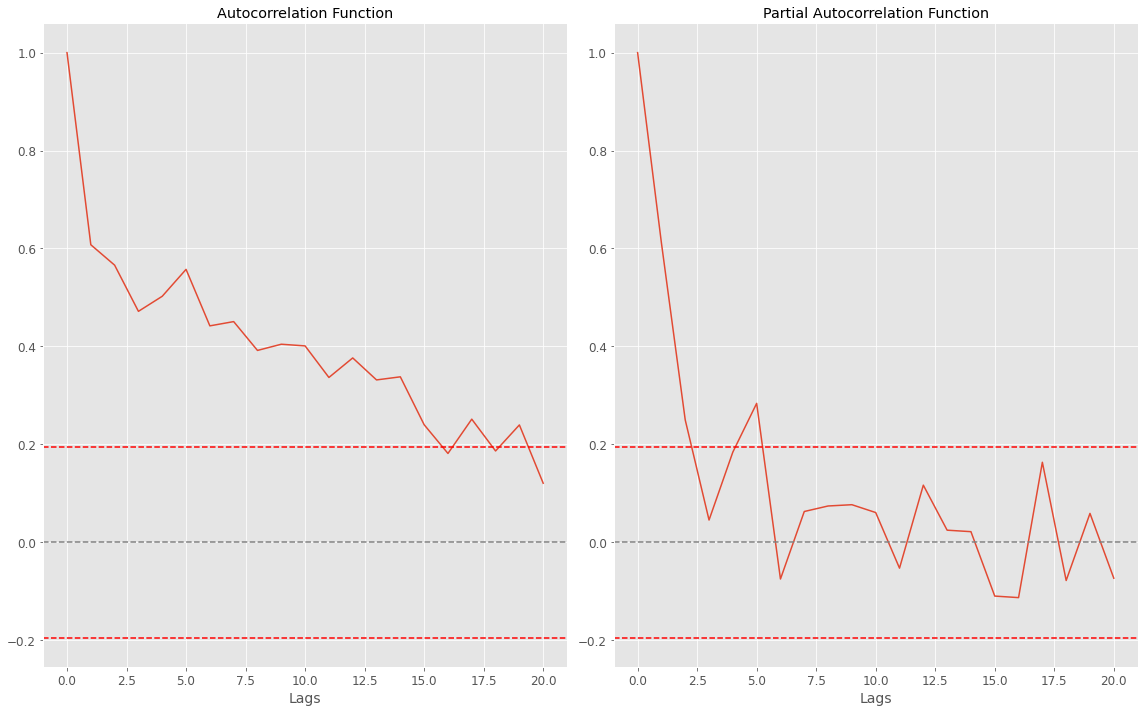

In [24]:
lag_acf = acf(df_log_diff, nlags=20)
lag_pacf = pacf(df_log_diff, nlags=20, method='ols')

# Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#### To make a better explanation of ARIMA we can also write it as (AR, I, MA) and by this, we can assume that in the ARIMA, p is AR, d is I and q is MA. These parameters can be explained as follows:

1. p is the number of autoregressive terms,
2. d is the number of nonseasonal differences,
3. q is the number of lagged forecast errors in the prediction equation.

### How to choose values of p, d and q?
##### There are various ways to choose the values of parameters of the ARIMA model. Without being confused we can do this using the following steps:

1. Test for stationarity using the augmented dickey fuller test.
2. If the time series is stationary try to fit the ARMA model, and if the time series is non-stationary then seek the value of d. 
3. If the data is getting stationary then draw the autocorrelation and partial autocorrelation graph of the data.
4. Draw a partial autocorrelation graph(ACF) of the data. This will help us in finding the value of p because the cut-off point to the PACF is p. 
5. Draw an autocorrelation graph(ACF) of the data. This will help us in finding the value of q because the cut-off point to the ACF is q. 

In [25]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter Selection for our ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [26]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.83495D+00    |proj g|=  1.77636D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.776D-10   6.835D+00
  F =   6.8349464070611496     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1396.3290670404745
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variabl

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: 


At iterate   15    f=  4.77342D+00    |proj g|=  9.92496D-03

At iterate   20    f=  4.77307D+00    |proj g|=  7.00418D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     20     23      1     0     0   7.004D-07   4.773D+00
  F =   4.7730724448124056     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:977.7067787417307
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18484D+01    |proj g|=  1.17402D+01

At iterate    

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: 


At iterate    5    f=  4.77925D+00    |proj g|=  2.57056D-03

At iterate   10    f=  4.77782D+00    |proj g|=  3.45209D-02

At iterate   15    f=  4.76903D+00    |proj g|=  6.09378D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     25      1     0     0   4.314D-05   4.769D+00
  F =   4.7689403897084608     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:978.863839500526
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: 


At iterate   10    f=  4.36042D+00    |proj g|=  9.69446D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     27      1     0     0   9.948D-09   4.360D+00
  F =   4.3601549739610759     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:893.4716146880595
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60673D+00    |proj g|=  5.15663D-01

At iterate    5    f=  4.59694D+00    |proj g|=  5.50475D-02

At iterate   1

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.42032D+00    |proj g|=  4.31925D-03

At iterate   10    f=  6.40049D+00    |proj g|=  2.96362D-01

At iterate   15    f=  5.17154D+00    |proj g|=  3.67479D-01

At iterate   20    f=  5.05698D+00    |proj g|=  2.42760D-01

At iterate   25    f=  5.04668D+00    |proj g|=  4.19682D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     44      1     0     0   3.395D-06   5.047D+00
  F =   5.0466820101898797     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1035.5231300787354
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   25    f=  5.10646D+00    |proj g|=  7.26765D-01

At iterate   30    f=  4.90906D+00    |proj g|=  4.94344D-02

At iterate   35    f=  4.90533D+00    |proj g|=  6.13465D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     68      1     0     0   2.981D-06   4.905D+00
  F =   4.9053329637658347     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1008.6879246082303
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:869.1500735214008
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.33209D+00    |proj g|=  5.02336D-01

At iterate    5    f=  4.58915D+00    |proj g|=  1.52363D-02

At iterate   10    f=  4.55371D+00    |proj g|=  3.68217D-02

At iterate   15    f=  4.32700D+00    |proj g|=  3.06864D-01

At iterate   20    f=  4.30444D+00    |proj g|=  6.43765D-02

At iterate   25    f=  4.30430D+00    |proj g|=  2.14652D-03

At iterate   30    f=  4.30413D+00    |proj g|=  6.05040D-02

At iterate   35    f=  4.29897D+00    |proj g|=  1.63183D-01

At iterate   40    f=  4.28712D+00    |proj g|=  1.03179D-01

At iterate   45    f=  4.26015D+00    |proj g|=  3.64381D-02

At iterate   50    f=  4.24320D+00    |proj g|=  1.46602D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluatio

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency info


At iterate    5    f=  3.32128D+00    |proj g|=  2.63388D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7      9      1     0     0   6.629D-07   3.321D+00
  F =   3.3212742432074198     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:681.5399456143136
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.35595D+00    |proj g|=  4.45019D-02

At iterate    5    f=  3.32107D+00    |proj g|=  7.95662D-03

At iterate   1

 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:625.9231012491027
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.29442D+00    |proj g|=  1.16382D-01

At iterate    5    f=  3.28199D+00    |proj g|=  8.97842D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     10      1     0     0   7.199D-06   3.282D+00
  F =   3.2819571933401708     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:673.5192674413948
RUNNING THE L-BFGS-B C

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: 


At iterate   10    f=  3.24368D+00    |proj g|=  5.30243D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     14      1     0     0   5.302D-08   3.244D+00
  F =   3.2436781613172414     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:667.7103449087173
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.26554D+00    |proj g|=  8.95544D-02

At iterate    5    f=  3.24134D+00    |proj g|=  5.70831D-03

At iterate   1

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: 


At iterate    5    f=  2.97954D+00    |proj g|=  3.94548D-02

At iterate   10    f=  2.96950D+00    |proj g|=  1.61834D-02

At iterate   15    f=  2.96862D+00    |proj g|=  5.23376D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     20      1     0     0   1.209D-05   2.969D+00
  F =   2.9686150308333259     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:613.5974662899985
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: 


At iterate   10    f=  3.31894D+00    |proj g|=  1.11784D-01

At iterate   15    f=  3.23117D+00    |proj g|=  6.33163D-02

At iterate   20    f=  3.19132D+00    |proj g|=  6.77592D-03

At iterate   25    f=  3.17574D+00    |proj g|=  8.99111D-02

At iterate   30    f=  3.16659D+00    |proj g|=  4.41757D-02

At iterate   35    f=  3.16272D+00    |proj g|=  1.03082D-01

At iterate   40    f=  3.16015D+00    |proj g|=  4.59854D-02

At iterate   45    f=  3.15860D+00    |proj g|=  4.24063D-02

At iterate   50    f=  3.15754D+00    |proj g|=  2.07449D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50     69   

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency info


At iterate    5    f=  4.40894D+00    |proj g|=  2.88211D-01

At iterate   10    f=  3.69077D+00    |proj g|=  4.08557D-01

At iterate   15    f=  3.46246D+00    |proj g|=  6.84658D-02

At iterate   20    f=  3.39099D+00    |proj g|=  1.40163D-02

At iterate   25    f=  3.38509D+00    |proj g|=  6.62648D-03

At iterate   30    f=  3.38470D+00    |proj g|=  6.48938D-04

At iterate   35    f=  3.38458D+00    |proj g|=  4.24224D-03

At iterate   40    f=  3.38443D+00    |proj g|=  3.28711D-03

At iterate   45    f=  3.38434D+00    |proj g|=  5.58724D-04

At iterate   50    f=  3.38429D+00    |proj g|=  3.66180D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency info


At iterate   15    f=  3.10729D+00    |proj g|=  8.32486D-02

At iterate   20    f=  3.08524D+00    |proj g|=  2.88011D-03

At iterate   25    f=  3.08273D+00    |proj g|=  3.17065D-03

At iterate   30    f=  3.08221D+00    |proj g|=  6.27971D-03

At iterate   35    f=  3.08212D+00    |proj g|=  6.80247D-04

At iterate   40    f=  3.08211D+00    |proj g|=  3.06231D-03

At iterate   45    f=  3.08211D+00    |proj g|=  1.53557D-03

At iterate   50    f=  3.08211D+00    |proj g|=  2.37500D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     59      1     0     0   2.375D-03   3.082D+00
  F =   3.08210830847

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency info


At iterate   15    f=  3.38044D+00    |proj g|=  9.31726D-02

At iterate   20    f=  3.35079D+00    |proj g|=  1.89381D-02

At iterate   25    f=  3.34668D+00    |proj g|=  3.28210D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     31      1     0     0   2.643D-06   3.347D+00
  F =   3.3466768244114382     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:688.7220721799334
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  3.13543D+00    |proj g|=  7.01804D-02

At iterate   20    f=  3.11388D+00    |proj g|=  4.19769D-02

At iterate   25    f=  3.10498D+00    |proj g|=  2.41577D-02

At iterate   30    f=  3.09699D+00    |proj g|=  3.51594D-02

At iterate   35    f=  3.09327D+00    |proj g|=  1.39736D-01

At iterate   40    f=  3.09183D+00    |proj g|=  1.54769D-02

At iterate   45    f=  3.09182D+00    |proj g|=  2.73733D-03

At iterate   50    f=  3.09117D+00    |proj g|=  1.10058D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     68      1     0     0   1.101D-01   3.091D+00
  F =   3.09117459390

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency info

ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:682.6300418888347
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97411D+01    |proj g|=  3.10507D+01

At iterate    5    f=  4.25322D+00    |proj g|=  2.19687D-01

At iterate   10    f=  3.44622D+00    |proj g|=  1.02845D-01

At iterate   15    f=  3.35121D+00    |proj g|=  2.56173D-02

At iterate   20    f=  3.31031D+00    |proj g|=  3.26722D-02

At iterate   25    f=  3.30485D+00    |proj g|=  5.07355D-03

At iterate   30    f=  3.30447D+00    |proj g|=  9.98601D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value



/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  3.08769D+00    |proj g|=  4.97613D-02

At iterate   10    f=  3.07309D+00    |proj g|=  1.03507D-01

At iterate   15    f=  3.02706D+00    |proj g|=  6.98605D-02

At iterate   20    f=  3.01444D+00    |proj g|=  3.20246D-02

At iterate   25    f=  3.01354D+00    |proj g|=  3.24684D-03

At iterate   30    f=  3.01269D+00    |proj g|=  8.12017D-03

At iterate   35    f=  3.01236D+00    |proj g|=  9.64526D-04

At iterate   40    f=  3.01232D+00    |proj g|=  6.18360D-04

At iterate   45    f=  3.01232D+00    |proj g|=  1.52404D-04

At iterate   50    f=  3.01232D+00    |proj g|=  3.79314D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency info

ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:616.4414900880088
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95262D+00    |proj g|=  1.94785D-02

At iterate    5    f=  2.94424D+00    |proj g|=  2.88835D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     10      1     0     0   1.872D-06   2.944D+00
  F =   2.9442175592442266     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:606.6203820858223
RUNNING THE L-BFGS-B C

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: 

ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:657.9923681427551
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.97556D+00    |proj g|=  4.61109D-02

At iterate    5    f=  2.97194D+00    |proj g|=  2.80922D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   1.540D-06   2.972D+00
  F =   2.9719318330321625     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:612.2740939385611
RUNNING THE L-BFGS-B C

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: 


At iterate    5    f=  2.87424D+00    |proj g|=  8.64105D-02

At iterate   10    f=  2.86465D+00    |proj g|=  3.46616D-02

At iterate   15    f=  2.86372D+00    |proj g|=  2.38551D-02

At iterate   20    f=  2.86155D+00    |proj g|=  2.03604D-03

At iterate   25    f=  2.86153D+00    |proj g|=  2.67396D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     29      1     0     0   3.723D-06   2.862D+00
  F =   2.8615323495427494     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:591.7525993067209
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


At iterate   15    f=  3.09080D+00    |proj g|=  4.16119D-03

At iterate   20    f=  3.09026D+00    |proj g|=  7.00127D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     27      1     0     0   7.082D-06   3.090D+00
  F =   3.0901968122241876     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:640.4001496937343
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.93658D+00    |proj g|=  4.55975D-02

At iterate    5

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  2.89028D+00    |proj g|=  7.37915D-02

At iterate   10    f=  2.86220D+00    |proj g|=  3.34776D-02

At iterate   15    f=  2.85834D+00    |proj g|=  5.64411D-03

At iterate   20    f=  2.85586D+00    |proj g|=  5.42263D-03

At iterate   25    f=  2.85579D+00    |proj g|=  3.90767D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     32      1     0     0   2.714D-06   2.856D+00
  F =   2.8557891523375316     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:592.5809870768564


The above output suggests that SARIMAX (1, 1, 1)x(1, 1, 1, 12) yields the lowest AIC value of 592.58. Therefore we should consider this to be optimal option.

**Fitting the ARIMA model**

In [27]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92803D+00    |proj g|=  6.29363D-02

At iterate    5    f=  2.89028D+00    |proj g|=  7.37915D-02

At iterate   10    f=  2.86220D+00    |proj g|=  3.34776D-02

At iterate   15    f=  2.85834D+00    |proj g|=  5.64411D-03

At iterate   20    f=  2.85586D+00    |proj g|=  5.42263D-03


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   25    f=  2.85579D+00    |proj g|=  3.90767D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     32      1     0     0   2.714D-06   2.856D+00
  F =   2.8557891523375316     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9706      0.071     13.755      0.000       0.832       1.109
ma.L1         -0.7168      0.108     -6.650      0.000      -0.928      -0.506
ar.S.L12       0.1445      0.204      0.707  

We need to always run model diagnostics to investigate any unusual behavior.

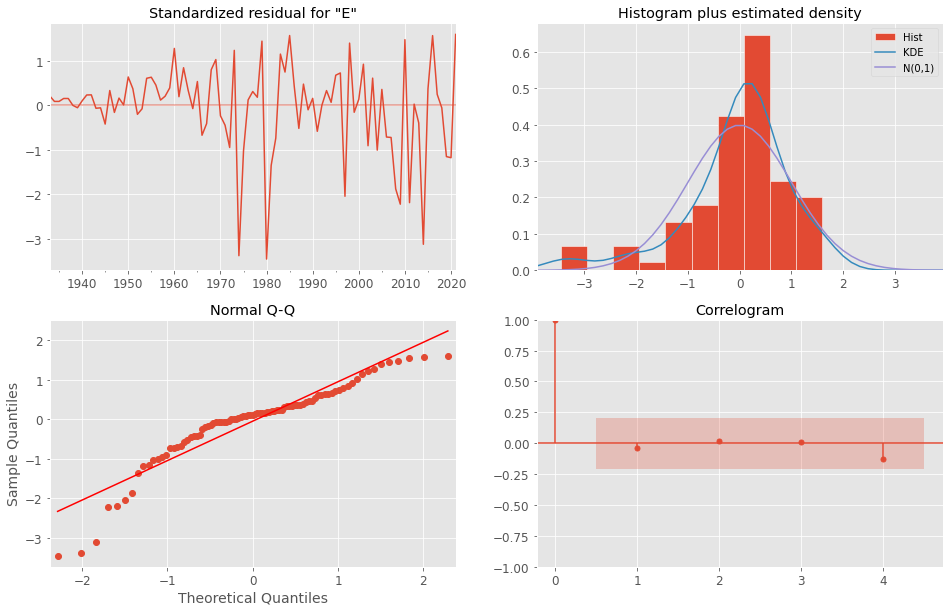

In [28]:
results.plot_diagnostics(lags=4)
plt.show()

1. Standardized residual for 'E' :
   A standardized residual is the raw residuals divided by an overall standard deviation of the raw residuals. This      provides a consistent measure of the error of your prediction.

2. Histogram plus estimated density :
   A density plot can be seen as an extension of the histogram. As opposed to the histogram, the density plot can     
   smooth out the distribution of values and reduce the noise. It visualizes the distribution of data over a given   
   period, and the peaks show where values are concentrated.

3. Normal Q-Q :
   A Quantile-Quantile plot (QQ-plot) shows the "match" of an observed distribution with a theoretical distribution,      almost always the normal distribution

4. correlogram :
   A correlogram, also known as Auto Correlation Function (ACF) plot, is a graphic way to demonstrate serial     
   correlation in data that doesn't remain constant with time. A correlogram gives a fair idea of auto-correlation 
   between data pairs at different time periods.

**Evaluation of Forecasts**

In order to understand the accuracy of our forecasts, we compare `predicted Electricity generated` to `actual Electricity generated` of the time series, and we set forecasts to start at `1970–01–01` to the end of the data.

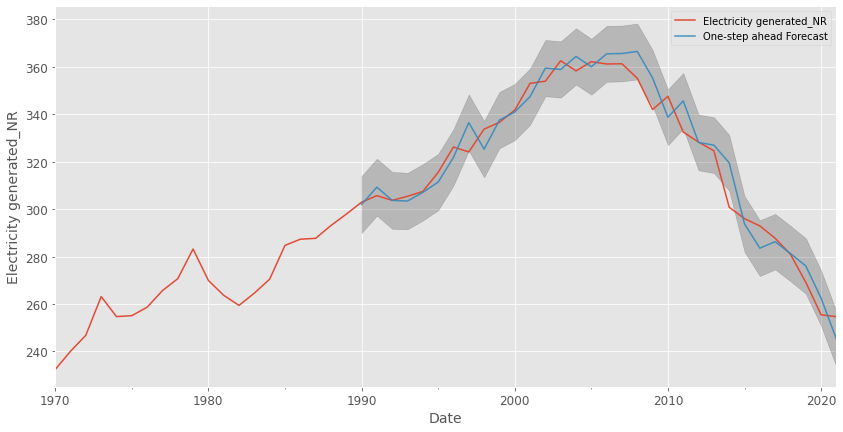

In [29]:
pred = results.get_prediction(start=pd.to_datetime('1990-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df['1970':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Electricity generated_NR')
plt.legend()
plt.show()

Let's find out the MSE to see the accuracy of our model. 
The mean squared error (MSE) is largely used as a metric to determine the performance of an algorithm. In addition, MSE is the average of the square of the difference between the observed and predicted values of a variable.

In [34]:
y_forecasted = pred.predicted_mean
y_truth = df['2017-01-01':]['Electricity generated_NR']
mse_SARIMA = ((y_forecasted - y_truth) ** 2).mean()
rmse=np.sqrt(mse_SARIMA)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_SARIMA, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 37.7
The Root Mean Squared Error of our forecasts is 6.14


**Visualising Forecasts**

As we can see in the below graph the `Electricity generated through non renewable resources` in UK will be declining in next years

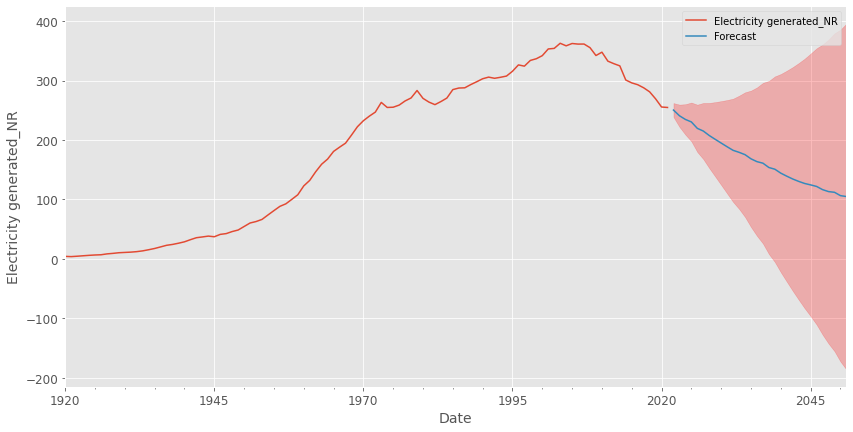

In [31]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = df.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Electricity generated_NR')
plt.legend()
plt.show()